In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, pairwise_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import datetime 
import warnings
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import seaborn as sns



# Uploading data

In [2]:
df = pd.read_csv("Df_invoices.csv")
df.head()

,Document Number,Name,Date,Invoice Sent Date,Due Date,Payment Date,Terms,Paying Transaction,Amount Remaining,Amount,Days Overdue,Expected PTP,Location,Date Closed,Contingent Due Date,PO Required,Last Collection Notice Sent
0,095279,7897,6/27/2019,5/23/2019,9/25/2019,NaN,Net 90,,406603.722,406603.722,0.0,9/30/2019,EMEA : Italy,NaN,No,No,NaN
1,091764,7206,2/18/2019,1/15/2019,6/30/2019,NaN,Net 132,,189000.000,189000.000,86.0,NaN,Asia Pacific : South Korea,NaN,No,No,2nd Past Due Notice
2,092603,7743,3/31/2019,2/12/2019,5/15/2019,NaN,Net 45,,166286.116,166286.116,132.0,NaN,EMEA : France,NaN,No,No,1st Past Due Notice
3,095285,7797,6/25/2019,5/8/2019,7/25/2019,NaN,Net 30,,159338.534,159338.534,61.0,NaN,EMEA : Austria,NaN,No,No,Disruption Notice
4,093141,7206,2/12/2019,2/28/2019,6/25/2019,7/31/2019,Net 133,Credit Memo #004641,152000.000,156000.000,91.0,NaN,Asia Pacific : South Korea,NaN,No,No,2nd Past Due Notice


In [3]:
#Let's see dtype and nunlls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30182 entries, 0 to 30181
Data columns (total 17 columns):
Document Number                30182 non-null object
Name                           30182 non-null object
Date                           30182 non-null object
Invoice Sent Date              19384 non-null object
Due Date                       30180 non-null object
Payment Date                   29903 non-null object
Terms                          30021 non-null object
Paying Transaction             30182 non-null object
Amount Remaining               30182 non-null float64
Amount                         30182 non-null float64
Days Overdue                   30180 non-null float64
Expected PTP                   6398 non-null object
Location                       30182 non-null object
Date Closed                    29873 non-null object
Contingent Due Date            30182 non-null object
PO Required                    30182 non-null object
Last Collection Notice Sent    10112 non-

Explanation of  what is every feature uplaoded above:
Document number - Number of the invoice
Payment date -  Date that invoie was paid
Terms - Net days to pay until due date
Paying transaction - ID Number of the payment transaction
Amount Reamining - Amount Remaning to pay
Expected PTP - payment date that client has promised to pay
Location - Location of the customer
Date Closed - Date that invoice was closed in the AR
Contingent Due Date -Yes for invoices with due date contingency
PO Required - Yes for invoices with  Purchase Order req.


# BUILDING OUR TARGET
Target - how many days will take to get the invoice paid

We need to convert date  columns from str to datatime using datetime library
Date is date of invoice
Payment Date is date that invoice has been paid
Date closed is date that invoice is closed in the system - once payment is posted,not always the same than date of payment


In [4]:
df[["Date","Payment Date","Invoice Sent Date",'Due Date',"Date Closed"]] = df[["Date","Payment Date","Invoice Sent Date",'Due Date',"Date Closed"]].apply(pd.to_datetime)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30182 entries, 0 to 30181
Data columns (total 17 columns):
Document Number                30182 non-null object
Name                           30182 non-null object
Date                           30182 non-null datetime64[ns]
Invoice Sent Date              19384 non-null datetime64[ns]
Due Date                       30180 non-null datetime64[ns]
Payment Date                   29903 non-null datetime64[ns]
Terms                          30021 non-null object
Paying Transaction             30182 non-null object
Amount Remaining               30182 non-null float64
Amount                         30182 non-null float64
Days Overdue                   30180 non-null float64
Expected PTP                   6398 non-null object
Location                       30182 non-null object
Date Closed                    29873 non-null datetime64[ns]
Contingent Due Date            30182 non-null object
PO Required                    30182 non-null object
L

In [6]:
df=df.dropna(subset=['Payment Date'])

In [7]:
df['Target'] = (df['Payment Date'] - df['Due Date']).dt.days


In [8]:
df['Target'].median()

15.0

In [9]:
df['Target'].value_counts().sort_values(ascending=False)

-30      1898
 0       1055
 1        635
 2        576
 3        529
-60       504
-1        455
-2        434
-45       434
 4        433
 6        410
 5        398
 11       374
 10       340
 12       339
 9        337
-3        335
 8        334
 7        328
 13       309
 17       293
 16       292
-4        284
 15       282
 14       276
 19       261
-5        259
 20       253
 22       249
-6        248
         ... 
 417        1
-303        1
 469        1
-979        1
-260        1
-459        1
-226        1
-242        1
-304        1
-306        1
 398        1
-272        1
 452        1
 516        1
-1186       1
-224        1
 494        1
 510        1
-684        1
-171        1
-251        1
-321        1
-289        1
-347        1
-145        1
-348        1
-129        1
-1362       1
-96         1
-166        1
Name: Target, Length: 700, dtype: int64

We just want the transactions that are payments:

In [10]:

df.rename(columns={'Paying Transaction': 'Paying_Transaction'}, inplace=True)

In [11]:


df['Paying_Transaction'] = df['Paying_Transaction'].apply(lambda x: 'Payment' in x )



In [12]:
df[df['Paying_Transaction']==True]

,Document Number,Name,Date,Invoice Sent Date,Due Date,Payment Date,Terms,Paying_Transaction,Amount Remaining,Amount,Days Overdue,Expected PTP,Location,Date Closed,Contingent Due Date,PO Required,Last Collection Notice Sent,Target
11,087922,7422,2018-11-20,2018-10-16,2019-01-19,2019-03-15,Net 60,True,78469.177,98646.960,248.0,NaN,EMEA : Denmark,NaT,No,Yes,Portal Lockout,55
23,094522,5251:1,2019-05-01,2019-04-11,2019-06-30,2019-07-17,Net 60,True,45766.269,120443.907,86.0,NaN,EMEA : France,NaT,No,Yes,2nd Past Due Notice,17
24,094522,5251:1,2019-05-01,2019-04-11,2019-06-30,2019-07-17,Net 60,True,45766.269,120443.907,86.0,NaN,EMEA : France,NaT,No,Yes,2nd Past Due Notice,17
33,095773,7953:1,2019-06-28,2019-05-13,2019-08-27,2019-08-27,Net 60,True,28000.000,139600.000,28.0,NaN,Asia Pacific,NaT,No,No,1st Past Due Notice,0
68,097134,9145,2019-06-28,2019-07-04,2019-09-26,2019-07-30,Net 90,True,12250.000,122400.000,0.0,NaN,North America : Mexico,NaT,No,No,NaN,-58
71,IND11000362,6369,2019-06-26,2019-07-23,2019-07-26,2019-08-21,Net 30,True,12216.694,144156.953,60.0,NaN,EMEA : India,NaT,No,Yes,NaN,26
73,IND11000362,6369,2019-06-26,2019-07-23,2019-07-26,2019-08-21,Net 30,True,12216.694,144156.953,60.0,NaN,EMEA : India,NaT,No,Yes,NaN,26
74,096759,5552,2019-06-02,2019-06-19,2019-07-02,2019-08-26,Net 30,True,12146.770,38462.760,84.0,NaN,North America : Mexico,NaT,No,No,2nd Past Due Notice,55
90,095871,5552,2019-06-11,2019-05-21,2019-07-11,2019-07-22,Net 30,True,9739.500,64930.000,75.0,NaN,North America : Mexico,NaT,No,No,2nd Past Due Notice,11
104,IND11000339,4642,2018-12-15,2018-12-28,2019-02-13,2019-03-08,Net 60,True,7204.303,27432.056,223.0,NaN,Asia Pacific : India,NaT,No,Yes,NaN,23


In [13]:
df.shape

(29903, 18)

In [14]:

df.query('Paying_Transaction == True', inplace = True) 

In [15]:
df.head()

,Document Number,Name,Date,Invoice Sent Date,Due Date,Payment Date,Terms,Paying_Transaction,Amount Remaining,Amount,Days Overdue,Expected PTP,Location,Date Closed,Contingent Due Date,PO Required,Last Collection Notice Sent,Target
11,087922,7422,2018-11-20,2018-10-16,2019-01-19,2019-03-15,Net 60,True,78469.177,98646.960,248.0,NaN,EMEA : Denmark,NaT,No,Yes,Portal Lockout,55
23,094522,5251:1,2019-05-01,2019-04-11,2019-06-30,2019-07-17,Net 60,True,45766.269,120443.907,86.0,NaN,EMEA : France,NaT,No,Yes,2nd Past Due Notice,17
24,094522,5251:1,2019-05-01,2019-04-11,2019-06-30,2019-07-17,Net 60,True,45766.269,120443.907,86.0,NaN,EMEA : France,NaT,No,Yes,2nd Past Due Notice,17
33,095773,7953:1,2019-06-28,2019-05-13,2019-08-27,2019-08-27,Net 60,True,28000.000,139600.000,28.0,NaN,Asia Pacific,NaT,No,No,1st Past Due Notice,0
68,097134,9145,2019-06-28,2019-07-04,2019-09-26,2019-07-30,Net 90,True,12250.000,122400.000,0.0,NaN,North America : Mexico,NaT,No,No,NaN,-58


In [16]:
df.shape

(19778, 18)

In [17]:
df['Document Number'].value_counts()

IND11000209    18
IND11000273    17
IND11000186    12
IND11000317    12
060776          9
074132          8
069007          6
089017          6
088491          6
IND11000238     6
067782          6
067388          6
081113          6
064625          6
075653          5
092594          5
062223          5
063972          5
066219          5
062185          5
067251          5
060297          5
063668          5
080793          5
082670          5
074889          4
058998          4
095769          4
082666          4
055893          4
               ..
083242          1
058115          1
067267          1
063776          1
076079          1
060627          1
076846          1
092170          1
075507          1
088370          1
083215          1
055905          1
067018          1
095312          1
075287          1
096747          1
057017          1
057874          1
077727          1
094941          1
093858          1
067869          1
084046          1
086037          1
094894    

In [18]:
df.drop_duplicates(subset='Document Number',inplace=True)

In [19]:
df.shape

(11435, 18)

# Let's play EDA!


# Creating relevant features

## Days to send invoice to the customer:

In [20]:
df['Days_to_send_inv'] = (df['Invoice Sent Date'] - df['Date']).dt.days

## Net terms: How many days the client is given to pay:

In [21]:
df['NetTerms'] = (df['Due Date'] - df['Date']).dt.days

## Location as an integer:

We want to take into cosideration the location of the client. We will point to each cuestomer depending on the location.

We will use of Government effectiveness index.  The index of Government Effectiveness captures perceptions of the quality of public services, the quality of the civil service and the degree of its independence from political pressures, the quality of policy formulation and implementation, and the credibility of the government's commitment to such policies. The highest value was in Singapore: 2.21 points and the lowest value was in Somalia: -2.21 points. 

Every country recieves a score. We substitue the string variable with the name of the country for a integer variable with the corresponding score given by the index.

In [22]:
df['Location'].value_counts()

EMEA : France                         1976
EMEA : UK                             1555
EMEA                                  1197
Asia Pacific : Australia               833
Asia Pacific : New Zealand             646
EMEA : Germany                         597
EMEA : Spain                           584
EMEA : Switzerland                     468
North America : US                     368
EMEA : Sweden                          298
EMEA : Netherlands                     296
North America : Mexico                 217
EMEA : Italy                           216
EMEA : Belgium                         215
EMEA : Denmark                         199
EMEA : Austria                         197
Latin America : Brazil                 160
Asia Pacific : Japan                   150
Asia Pacific : HongKong                142
Asia Pacific : India                   129
EMEA : Portugal                        120
EMEA : Norway                          103
Asia Pacific : Singapore                96
EMEA : Sout

In [23]:
my_dict={'EMEA : France':1.35, 'Asia Pacific : Australia': 1.54, 'EMEA : UK':1.41, 'EMEA : Spain':1.03,'Asia Pacific : New Zealand ':1.77,'EMEA : Switzerland':2.06,
         'EMEA : Germany':1.72,'North America : US':1.55,'Asia Pacific : India':0.09,'EMEA : Belgium':1.18,
         'EMEA : Netherlands':1.85,'EMEA : Sweden':1.84,'Asia Pacific : Singapore':2.21,'EMEA : Austria':1.46,
         'North America : Mexico':-0.03,'EMEA : Italy':0.50,'EMEA : Denmark':1.80,'Asia Pacific : Japan':1.62,
         'EMEA : Portugal':1.33,'Asia Pacific : HongKong':1.90,'Latin America : Brazil':-0.29,'EMEA : Norway':1.98,
         'EMEA : Israel':1.39,'EMEA : United Arab Emirates':1.40,'EMEA : South Africa':0.28,'EMEA : Ireland':1.41,
         'EMEA : Luxembourg':1.68,'Asia Pacific : Thailand':0.38,'EMEA : Finland':1.94,'Asia Pacific : China':0.42,
         'Asia Pacific : South Korea':1.08,'EMEA : Czech Republic':1.02,'Latin America : Colombia':-0.07,
         'EMEA : Romania':-0.17,'Latin America : Chile':0.85,'North America : Canada':1.85,'EMEA : Poland':0.63,
         'North America : Dominican Republic':-0.35,'Latin America : Peru':-0.13,'Asia Pacific : Malaysia':0.84,
         'EMEA : Qatar':0.74,'EMEA : Hungary':0.51,'Latin America : Argentina':0.16,'Asia Pacific : Cambodia':-0.66,
         'EMEA : Lebanon':-0.51,'EMEA : Latvia':0.90,'EMEA : India':0.09     }
df['Location']=df['Location'].map(my_dict)

In [24]:
df['Location']

11       1.80
23       1.35
33        NaN
68      -0.03
71       0.09
74      -0.03
90      -0.03
104      0.09
113     -0.03
123       NaN
128      0.09
168       NaN
179     -0.03
186      1.03
192      1.54
216      0.09
228     -0.03
230     -0.29
260      1.03
265     -0.07
269     -0.03
274     -0.03
291     -0.03
305      0.09
308     -0.03
309      1.33
311      1.35
313      1.35
315      1.33
319      1.33
         ... 
30132    1.55
30133    2.06
30135    1.72
30136    1.72
30137    1.35
30138    1.68
30140    1.54
30143    1.41
30144    1.54
30146    1.54
30148    1.41
30149    1.41
30154    1.18
30155    0.50
30156    1.94
30157    1.54
30160    2.06
30162    1.54
30167    1.35
30168    1.35
30169    1.85
30170    1.54
30173    1.54
30175    1.35
30176    1.18
30177    1.55
30178    1.41
30179    1.35
30180    1.90
30181    1.90
Name: Location, Length: 11435, dtype: float64

In [25]:
df=df.dropna(subset=['Location'])

## Expected PTP, Contingent Due Date, PO Required:

In [26]:
df.loc[df['Expected PTP'].isnull(),'Expected PTP']=False
df.loc[df['Expected PTP']!=False,'Expected PTP']=True

In [27]:
df=pd.get_dummies(df,columns=['Expected PTP'],drop_first=True)
df=pd.get_dummies(df,columns=['Contingent Due Date'],drop_first=True)
df=pd.get_dummies(df,columns=['PO Required'],drop_first=True)

## Histogram of Days_to_be_paid


In [28]:
df=df[df.Target >-10]

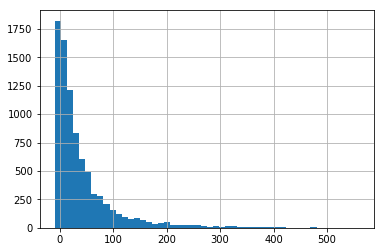

In [29]:
df['Target'].hist(bins=50)
plt.show()

In [30]:
df.drop( df[df['Target'] > 100 ].index , inplace=True)

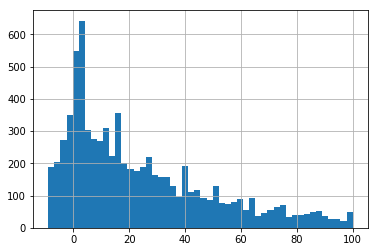

In [31]:
df['Target'].hist(bins=50)
plt.show()

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7507 entries, 11 to 30181
Data columns (total 20 columns):
Document Number                7507 non-null object
Name                           7507 non-null object
Date                           7507 non-null datetime64[ns]
Invoice Sent Date              4757 non-null datetime64[ns]
Due Date                       7507 non-null datetime64[ns]
Payment Date                   7507 non-null datetime64[ns]
Terms                          7469 non-null object
Paying_Transaction             7507 non-null bool
Amount Remaining               7507 non-null float64
Amount                         7507 non-null float64
Days Overdue                   7507 non-null float64
Location                       7507 non-null float64
Date Closed                    7489 non-null datetime64[ns]
Last Collection Notice Sent    2604 non-null object
Target                         7507 non-null int64
Days_to_send_inv               4757 non-null float64
NetTerms         

## Correlation

We want to see the correlation between the chose variables to explain target and our target

In [34]:

corr = df.drop(['Document Number','Name','Date','Invoice Sent Date','Due Date','Payment Date','Terms',
              'Paying_Transaction','Days Overdue','Date Closed','Expected PTP_True','Contingent Due Date_Yes','PO Required_Yes'],axis=1).corr()
corr.style.background_gradient().set_precision(2)

,Amount Remaining,Amount,Location,Target,Days_to_send_inv,NetTerms
Amount Remaining,1,0.0067,-0.016,0.016,-0.02,0.013
Amount,0.0067,1,0.024,-0.073,-0.046,0.068
Location,-0.016,0.024,1,-0.12,-0.054,-0.00064
Target,0.016,-0.073,-0.12,1,0.2,-0.081
Days_to_send_inv,-0.02,-0.046,-0.054,0.2,1,0.058
NetTerms,0.013,0.068,-0.00064,-0.081,0.058,1


## Scatter plot :  Location vs Days to be paid


Scatter plot to see relation between locations and days taken to bepaid
We se that the line of points continues for those one close to 1.5 points and
is reduced when the client is above 1.5

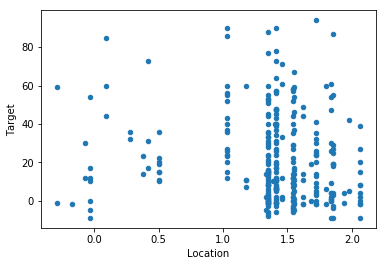

In [35]:
df.sample(n=300).plot.scatter(x='Location', y='Target', s=None, c=None)
plt.show()

## Has the client short paid or withheld taxes?

I want to see what are the invoice that had payments but they still have open amounts. I am checking whether this
due to withholding taxes or the client short paid.

In [36]:

df['Amount Remaining'].value_counts()

0.000        7489
6715.690        1
12216.694       1
9739.500        1
12146.770       1
1040.200        1
5318.989        1
7204.303        1
746.930         1
45766.269       1
112.656         1
4353.460        1
2286.180        1
78469.177       1
911.150         1
2255.461        1
2810.375        1
402.410         1
60.000          1
Name: Amount Remaining, dtype: int64

In [37]:
df.loc[df['Amount Remaining'] > 0]

,Document Number,Name,Date,Invoice Sent Date,Due Date,Payment Date,Terms,Paying_Transaction,Amount Remaining,Amount,Days Overdue,Location,Date Closed,Last Collection Notice Sent,Target,Days_to_send_inv,NetTerms,Expected PTP_True,Contingent Due Date_Yes,PO Required_Yes
11,087922,7422,2018-11-20,2018-10-16,2019-01-19,2019-03-15,Net 60,True,78469.177,98646.960,248.0,1.80,NaT,Portal Lockout,55,-35.0,60,0,0,1
23,094522,5251:1,2019-05-01,2019-04-11,2019-06-30,2019-07-17,Net 60,True,45766.269,120443.907,86.0,1.35,NaT,2nd Past Due Notice,17,-20.0,60,0,0,1
71,IND11000362,6369,2019-06-26,2019-07-23,2019-07-26,2019-08-21,Net 30,True,12216.694,144156.953,60.0,0.09,NaT,NaN,26,27.0,30,0,0,1
74,096759,5552,2019-06-02,2019-06-19,2019-07-02,2019-08-26,Net 30,True,12146.770,38462.760,84.0,-0.03,NaT,2nd Past Due Notice,55,17.0,30,0,0,0
90,095871,5552,2019-06-11,2019-05-21,2019-07-11,2019-07-22,Net 30,True,9739.500,64930.000,75.0,-0.03,NaT,2nd Past Due Notice,11,-21.0,30,0,0,0
104,IND11000339,4642,2018-12-15,2018-12-28,2019-02-13,2019-03-08,Net 60,True,7204.303,27432.056,223.0,0.09,NaT,NaN,23,13.0,60,0,0,1
113,096757,5552,2019-06-02,2019-06-19,2019-07-02,2019-08-26,Net 30,True,6715.690,22018.970,84.0,-0.03,NaT,2nd Past Due Notice,55,17.0,30,0,0,0
128,IND11000317,4909,2018-09-26,2018-08-29,2018-10-26,2018-12-18,Net 30,True,5318.989,41924.334,333.0,0.09,NaT,NaN,53,-28.0,30,0,0,0
179,096752,5552,2019-06-02,2019-06-19,2019-07-02,2019-09-05,Net 30,True,4353.460,17413.830,84.0,-0.03,NaT,2nd Past Due Notice,65,17.0,30,0,0,0
216,IND11000343,6893,2019-03-31,2019-03-19,2019-05-30,2019-08-30,Net 60,True,2810.375,33162.440,117.0,0.09,NaT,NaN,92,-12.0,60,0,0,0


In [38]:
df['Rate withheld']=df['Amount Remaining']/df['Amount']

In [39]:
df['Rate withheld'].sort_values(ascending=False)

11       0.795455
23       0.379980
74       0.315806
291      0.314998
113      0.304996
104      0.262624
179      0.250000
269      0.236345
265      0.200966
274      0.199999
228      0.151994
90       0.150000
128      0.126871
71       0.084746
216      0.084746
305      0.084743
230      0.050000
308      0.005027
11079    0.000000
11111    0.000000
11110    0.000000
11108    0.000000
11092    0.000000
11084    0.000000
11068    0.000000
11076    0.000000
11074    0.000000
11070    0.000000
11060    0.000000
11117    0.000000
           ...   
21003    0.000000
20997    0.000000
20874    0.000000
20994    0.000000
20876    0.000000
20878    0.000000
20885    0.000000
20891    0.000000
20900    0.000000
20908    0.000000
20937    0.000000
20938    0.000000
20942    0.000000
20943    0.000000
20948    0.000000
20950    0.000000
20952    0.000000
20953    0.000000
20958    0.000000
20960    0.000000
20962    0.000000
20966    0.000000
20967    0.000000
20976    0.000000
20978    0

We should remove the first one. Probably not the only one that it is not withholding taxes they
are a few and for a low amount.

## Scatter plot: Days to be paid vs. Days to send invoice

In [40]:
#df=df.drop(5334)

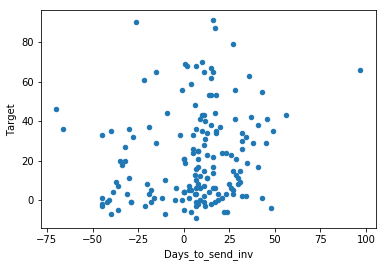

In [41]:
df.sample(n=250).plot.scatter(x='Days_to_send_inv', y='Target', s=None, c=None)

In [42]:
df.drop( df[df['Days_to_send_inv'] > 50 ].index , inplace=True)
df.drop( df[df['Days_to_send_inv'] < -50 ].index , inplace=True)

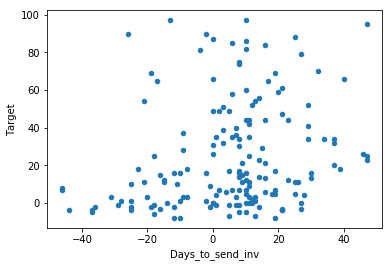

In [43]:
df.sample(n=250).plot.scatter(x='Days_to_send_inv', y='Target', s=None, c=None)

# Machine Learning: Split data and prepare to model


In [44]:
#Split data

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
#df_valid, df_test = train_test_split(df_test, test_size=0.7, random_state=42)

#Define Df_train, df_test, df_valid
#df_train=df_train.loc[:,'Amount':]
#df_train=df_train.drop(['Document Number','Date','Invoice Sent Date','Due Date','Terms','Paying_Transaction','Amount Remaining',
#                        'Days Overdue','Date Closed','Last Collection Notice Sent'],axis=1)

#df_test=df_test.loc[:,'Amount':]
#df_test=df_test.drop(['Document Number','Date','Invoice Sent Date','Due Date','Terms','Paying_Transaction','Amount Remaining',
#                        'Days Overdue','Date Closed','Last Collection Notice Sent'],axis=1)

#df_valid=df_valid.loc[:,'Amount':]
#df_valid=df_valid.drop(['Days Overdue','Days_tobe_paid','Date Closed','Last Collection Notice Sent'],axis=1)

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5111 entries, 14377 to 30110
Data columns (total 21 columns):
Document Number                5111 non-null object
Name                           5111 non-null object
Date                           5111 non-null datetime64[ns]
Invoice Sent Date              3200 non-null datetime64[ns]
Due Date                       5111 non-null datetime64[ns]
Payment Date                   5111 non-null datetime64[ns]
Terms                          5082 non-null object
Paying_Transaction             5111 non-null bool
Amount Remaining               5111 non-null float64
Amount                         5111 non-null float64
Days Overdue                   5111 non-null float64
Location                       5111 non-null float64
Date Closed                    5099 non-null datetime64[ns]
Last Collection Notice Sent    1749 non-null object
Target                         5111 non-null int64
Days_to_send_inv               3200 non-null float64
NetTerms      

We are still seeing nun values

In [46]:
df_train=df_train.dropna(subset=['Days_to_send_inv'])
df_test=df_test.dropna(subset=['Days_to_send_inv'])
#df_valid=df_test.dropna(subset=['Days_to_send_inv'])

In [47]:
#No nan
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200 entries, 14377 to 30110
Data columns (total 21 columns):
Document Number                3200 non-null object
Name                           3200 non-null object
Date                           3200 non-null datetime64[ns]
Invoice Sent Date              3200 non-null datetime64[ns]
Due Date                       3200 non-null datetime64[ns]
Payment Date                   3200 non-null datetime64[ns]
Terms                          3172 non-null object
Paying_Transaction             3200 non-null bool
Amount Remaining               3200 non-null float64
Amount                         3200 non-null float64
Days Overdue                   3200 non-null float64
Location                       3200 non-null float64
Date Closed                    3188 non-null datetime64[ns]
Last Collection Notice Sent    1738 non-null object
Target                         3200 non-null int64
Days_to_send_inv               3200 non-null float64
NetTerms      

In [48]:
#No nan
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 28056 to 25875
Data columns (total 21 columns):
Document Number                1352 non-null object
Name                           1352 non-null object
Date                           1352 non-null datetime64[ns]
Invoice Sent Date              1352 non-null datetime64[ns]
Due Date                       1352 non-null datetime64[ns]
Payment Date                   1352 non-null datetime64[ns]
Terms                          1344 non-null object
Paying_Transaction             1352 non-null bool
Amount Remaining               1352 non-null float64
Amount                         1352 non-null float64
Days Overdue                   1352 non-null float64
Location                       1352 non-null float64
Date Closed                    1348 non-null datetime64[ns]
Last Collection Notice Sent    741 non-null object
Target                         1352 non-null int64
Days_to_send_inv               1352 non-null float64
NetTerms       

# New feature: Average of days to pay in the past
## We will create a new feature with average of days to pay invoices in the past.

In [49]:
df2=df_train.groupby(['Name'])['Target'].median()

In [50]:
df_train['ave_Days_tobe_paid']=df_train.apply(lambda r: df2.loc[r['Name']],axis=1)

In [51]:
#df_test['ave_Days_tobe_paid']=df_test.apply(lambda r: df2.loc[r['Name']],axis=1)

In [52]:
df_test= pd.merge(df_test,df2,on='Name',how='left')

In [53]:
df_test.rename(columns={"Target_y": 'ave_Days_tobe_paid'},inplace=True)

In [54]:
df_test.head()

,Document Number,Name,Date,Invoice Sent Date,Due Date,Payment Date,Terms,Paying_Transaction,Amount Remaining,Amount,...,Date Closed,Last Collection Notice Sent,Target_x,Days_to_send_inv,NetTerms,Expected PTP_True,Contingent Due Date_Yes,PO Required_Yes,Rate withheld,ave_Days_tobe_paid
0,092799,6933,2019-03-31,2019-02-14,2019-05-15,2019-06-25,Net 45,True,0.0,223348.610,...,2019-06-25,1st Past Due Notice,41,-45.0,45,1,0,1,0.0,42.0
1,093394,5043,2019-04-20,2019-03-12,2019-05-20,2019-05-20,Net 30,True,0.0,79737.852,...,2019-05-20,NaN,0,-39.0,30,0,0,0,0.0,7.5
2,078087,4766:1,2017-12-19,2018-01-16,2018-02-17,2018-02-21,Net 60,True,0.0,1939.140,...,2018-02-21,1st Past Due Notice,4,28.0,60,0,0,0,0.0,-0.5
3,090444,1679,2018-12-01,2018-12-10,2019-01-30,2019-01-24,N60,True,0.0,563465.784,...,2019-01-25,NaN,-6,9.0,60,1,0,1,0.0,8.0
4,084801,6087,2018-07-01,2018-07-13,2018-08-15,2018-08-17,Net 45,True,0.0,10929.291,...,2018-08-17,NaN,2,12.0,45,1,0,1,0.0,30.0


In [55]:
df_train['ave_Days_tobe_paid'].fillna(15, inplace=True)

In [56]:
df_test['ave_Days_tobe_paid'].fillna(15, inplace=True)

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200 entries, 14377 to 30110
Data columns (total 22 columns):
Document Number                3200 non-null object
Name                           3200 non-null object
Date                           3200 non-null datetime64[ns]
Invoice Sent Date              3200 non-null datetime64[ns]
Due Date                       3200 non-null datetime64[ns]
Payment Date                   3200 non-null datetime64[ns]
Terms                          3172 non-null object
Paying_Transaction             3200 non-null bool
Amount Remaining               3200 non-null float64
Amount                         3200 non-null float64
Days Overdue                   3200 non-null float64
Location                       3200 non-null float64
Date Closed                    3188 non-null datetime64[ns]
Last Collection Notice Sent    1738 non-null object
Target                         3200 non-null int64
Days_to_send_inv               3200 non-null float64
NetTerms      

In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 0 to 1351
Data columns (total 22 columns):
Document Number                1352 non-null object
Name                           1352 non-null object
Date                           1352 non-null datetime64[ns]
Invoice Sent Date              1352 non-null datetime64[ns]
Due Date                       1352 non-null datetime64[ns]
Payment Date                   1352 non-null datetime64[ns]
Terms                          1344 non-null object
Paying_Transaction             1352 non-null bool
Amount Remaining               1352 non-null float64
Amount                         1352 non-null float64
Days Overdue                   1352 non-null float64
Location                       1352 non-null float64
Date Closed                    1348 non-null datetime64[ns]
Last Collection Notice Sent    741 non-null object
Target_x                       1352 non-null int64
Days_to_send_inv               1352 non-null float64
NetTerms            

In [59]:
X_train = df_train.drop(['Name','Date', 'Invoice Sent Date','Due Date','Payment Date','Document Number',
                         'Terms','Paying_Transaction','Amount Remaining', 
                        'Days Overdue','Date Closed','Last Collection Notice Sent','Target'],axis=1)

y_train=df_train['Target']

X_test = df_test.drop(['Name','Date', 'Invoice Sent Date','Due Date','Payment Date','Document Number',
                         'Terms','Paying_Transaction','Amount Remaining', 
                        'Days Overdue','Date Closed','Last Collection Notice Sent','Target_x'],axis=1)

y_test=df_test['Target_x']

#X_valid = df_valid.drop('Target_True',axis=1)
#y_valid = df_valid['Target_True']

In [60]:
X_train.shape

(3200, 9)

In [61]:
y_test.shape

(1352,)

In [62]:
y_test=y_test.astype(float)

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200 entries, 14377 to 30110
Data columns (total 9 columns):
Amount                     3200 non-null float64
Location                   3200 non-null float64
Days_to_send_inv           3200 non-null float64
NetTerms                   3200 non-null int64
Expected PTP_True          3200 non-null uint8
Contingent Due Date_Yes    3200 non-null uint8
PO Required_Yes            3200 non-null uint8
Rate withheld              3200 non-null float64
ave_Days_tobe_paid         3200 non-null float64
dtypes: float64(5), int64(1), uint8(3)
memory usage: 184.4 KB


In [64]:
#I will drop from the model features with contribution less than 1.5% to see if we can get better results
X_train = X_train.drop(columns=['Contingent Due Date_Yes','PO Required_Yes',
                                'Rate withheld', 'Expected PTP_True'])
X_test = X_test.drop(columns=['Contingent Due Date_Yes','PO Required_Yes',
                                'Rate withheld', 'Expected PTP_True',])

In [65]:
#Lets see the importance of each feauture
dt = DecisionTreeClassifier(max_depth=5,
                            min_samples_split=10,
                            min_samples_leaf=10)
dt.fit(X_train, y_train)
pd.Series(dt.feature_importances_,
          index=X_test.columns)

Amount                0.025212
Location              0.009337
Days_to_send_inv      0.012223
NetTerms              0.009425
ave_Days_tobe_paid    0.943802
dtype: float64

In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200 entries, 14377 to 30110
Data columns (total 5 columns):
Amount                3200 non-null float64
Location              3200 non-null float64
Days_to_send_inv      3200 non-null float64
NetTerms              3200 non-null int64
ave_Days_tobe_paid    3200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 150.0 KB


In [67]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 0 to 1351
Data columns (total 5 columns):
Amount                1352 non-null float64
Location              1352 non-null float64
Days_to_send_inv      1352 non-null float64
NetTerms              1352 non-null int64
ave_Days_tobe_paid    1352 non-null float64
dtypes: float64(4), int64(1)
memory usage: 63.4 KB


In [68]:
y_test.shape

(1352,)

In [69]:
#X_train = X_train.drop(columns=['Location','NetTerms'])
#X_test = X_test.drop(columns=['Location','NetTerms'])

# Linear Regression

In [70]:
lm = LinearRegression().fit(X_train, y_train)

In [71]:
y_predict_train = lm.predict(X_train)
y_predict_test= lm.predict(X_test)

In [72]:
lm.coef_

array([-6.13001725e-06, -1.41908232e-01,  1.63676977e-01, -4.48881287e-02,
        8.55247632e-01])

In [73]:
rmse1 = np.sqrt(MSE(y_train,
                   y_predict_train))
print ("RMSE = {:.2f}".format(rmse1))

RMSE = 18.70


In [74]:
rmse2 = np.sqrt(MSE(y_predict_test,
                   y_test))
print ("RMSE = {:.2f}".format(rmse2))

RMSE = 25.17


In [75]:
r2_score(y_test, y_predict_test)

0.023810226333337736

## Random Forest Regression

In [76]:
 regr = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)
regr.fit(X_train, y_train)  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [77]:
y_pred_train_rf = regr.predict(X_train)
y_pred_test_rf =  regr.predict(X_test)

In [78]:
np.where(np.isnan(y_pred_test_rf))

(array([], dtype=int64),)

In [79]:
y_pred_test_rf.dtype

dtype('float64')

In [80]:
rmse = np.sqrt(MSE(y_train,
                   y_pred_train_rf))
print ("RMSE = {:.2f}".format(rmse))

RMSE = 19.37


In [81]:
rmse = np.sqrt(MSE(y_test,
                   y_pred_test_rf))
print ("RMSE = {:.2f}".format(rmse))

RMSE = 25.34


In [82]:
r2_score(y_test, y_pred_test_rf)

0.010721654760581734